In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from datetime import timedelta
import pickle

In [2]:
nyc_data = pd.read_csv("nyc_data.csv", parse_dates=['date'])
tulsa_data = pd.read_csv("tulsa_data.csv", parse_dates=['date'])
la_data = pd.read_csv("la_data.csv", parse_dates=['date'])

In [3]:
# utility function to split test and train
def data_split(df, columns, date_range):
    df.drop(df.columns.difference(columns), 1, inplace=True)

    df["date_from_start"] = df["date"] - pd.to_datetime('2020-03-01')
    df["date_from_start"] = df["date_from_start"] / np.timedelta64(1,"D")
    end_train, end_test = date_range
    train = df[(df['date'] < end_train)]
    test = df[(df['date'] >= end_train) & (df['date'] < end_test)]
    
    # print(train.head())
    train_y = train["deaths"]#train.deaths.values
    train_x = train.drop(["deaths", "date"], axis=1)
    test_y = test["deaths"] #test.date.values
    test_x = test.drop(["deaths", "date"], axis=1)

    return train_x, train_y, test_x, test_y

In [4]:
# define date ranges for different periods of the pandemic
date_range_1 = ('2020-05-01', '2020-06-01')
date_range_2 = ('2020-08-01', '2020-09-01')
date_range_3 = ('2020-10-01', '2020-11-01')
date_ranges = [date_range_1, date_range_2, date_range_3]

# define column categories
base_columns = ['deaths', 'date']
google_maps_columns = ['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']
apple_maps_columns = ['apple_driving', 'apple_transit', 'apple_walking']
mask_score_column = ['maskScore']
mask_breakdown_column = ['mask_never', 'mask_rarely', 'mask_sometimes', 'mask_frequently', 'mask_always']
PSScore_column = ['PSScore']

# define feture column combinations
feature_columns_all = { 
                "1": base_columns + PSScore_column + google_maps_columns + mask_score_column,
                "2": base_columns + PSScore_column + google_maps_columns + mask_breakdown_column,
                "3": base_columns + PSScore_column + apple_maps_columns + mask_score_column,
                "4": base_columns + PSScore_column + google_maps_columns + apple_maps_columns + mask_breakdown_column,
                "5": base_columns + PSScore_column + google_maps_columns + apple_maps_columns + mask_score_column,
                "6": base_columns + PSScore_column + apple_maps_columns + mask_breakdown_column,
                "7": base_columns + PSScore_column + mask_score_column,
                "8": base_columns + PSScore_column + mask_breakdown_column,
                "9": base_columns + PSScore_column + google_maps_columns,
                "10": base_columns + PSScore_column + apple_maps_columns,
}

# define models
models = {"SVM - Linear": SVR(kernel='linear', gamma='auto'),
            # "SVM - Polynomial": SVR(kernel='poly', gamma='auto'),
            "Linear Regression": LinearRegression(),
            "Random Forest": RandomForestRegressor(n_estimators = 10),
            "AdaBoost Regression": AdaBoostRegressor(),
            "Neural Network": MLPRegressor(max_iter=2000),
            }

model_colors = {"SVM - Linear": "#1f77b4",
            "SVM - Polynomial": "#8c564b",
            "Linear Regression": "#ff7f0e",
            "Random Forest": "#2ca02c",
            "AdaBoost Regression": "#d62728",
            "Neural Network": "#9467bd",
            }

In [5]:
def modelIterations(model, data, columns, daterange):
    # endTrain, endTest = pd.to_datetime(daterange[0]), pd.to_datetime(daterange[1])
    rmse_scores = []
    rmse_percent_scores = []
    predictions = []
    for i in range(4):
        endTrain, endTest = pd.to_datetime(daterange[0]), pd.to_datetime(daterange[1])
        daysToAdd = i * 7
        endTrain = endTrain + timedelta(days=daysToAdd)
        endTest = endTrain + timedelta(days=7)
        daterange_temp = [endTrain, endTest]
        train_x, train_y, test_x, test_y = data_split(data, columns, daterange_temp)

        model.fit(train_x, train_y)
        preds = model.predict(test_x)
        rmse = mean_squared_error(test_y, preds, squared=False)
        
        rmse_scores.append(rmse)
        rmse_percent_scores.append(rmse/ test_y.mean() * 100)
        predictions.append(preds)

    return rmse_scores, rmse_percent_scores, predictions

       43.69045655, 44.41870294]), array([41.39466564, 43.36340711, 43.99370274, 46.48205563, 46.69950635,
       48.26357534, 47.3177237 ]), array([45.95558771, 46.94796151, 45.90874949, 48.57482347, 48.07892141,
       49.02862712, 49.55711031])]
current model:  Linear Regression
rmse_scores:  [2.0258622019194585, 5.293181936043025, 7.96139820513737, 1.5871448216369772]
rmse_percent_scores:  [5.835817042566341, 14.530303353843596, 21.10976796816727, 3.4937150161820254]
predictions:  [array([33.36687722, 35.31364711, 35.22302631, 36.71471181, 37.65821861,
       38.68936305, 38.83209107]), array([38.38000111, 40.76628245, 40.04208717, 41.0458041 , 40.96194848,
       44.03433712, 44.79519271]), array([41.4029863 , 44.4059333 , 44.88601163, 46.23948512, 46.4939956 ,
       47.87864049, 47.27526076]), array([43.95515341, 45.50647681, 44.61715449, 45.2498614 , 46.29140919,
       47.28223752, 47.88871486])]
current model:  Random Forest
rmse_scores:  [2.2769026580611023, 1.75824587911604

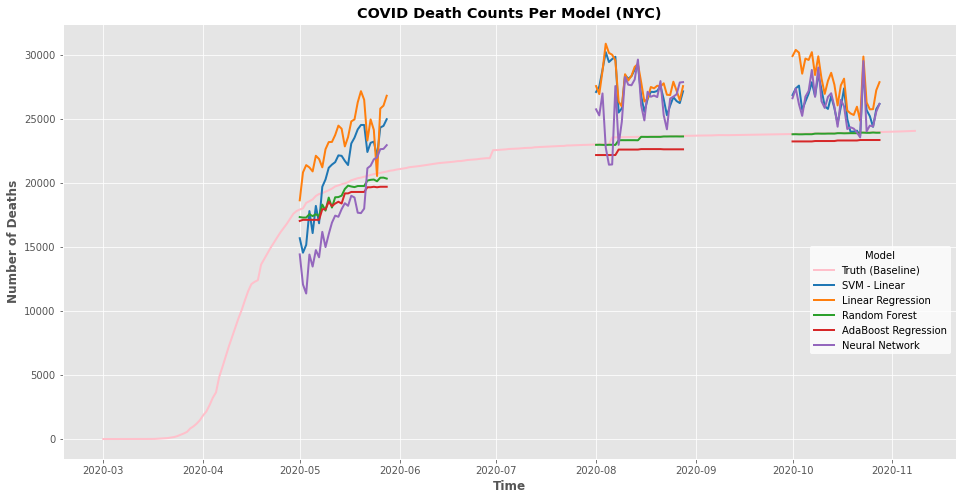

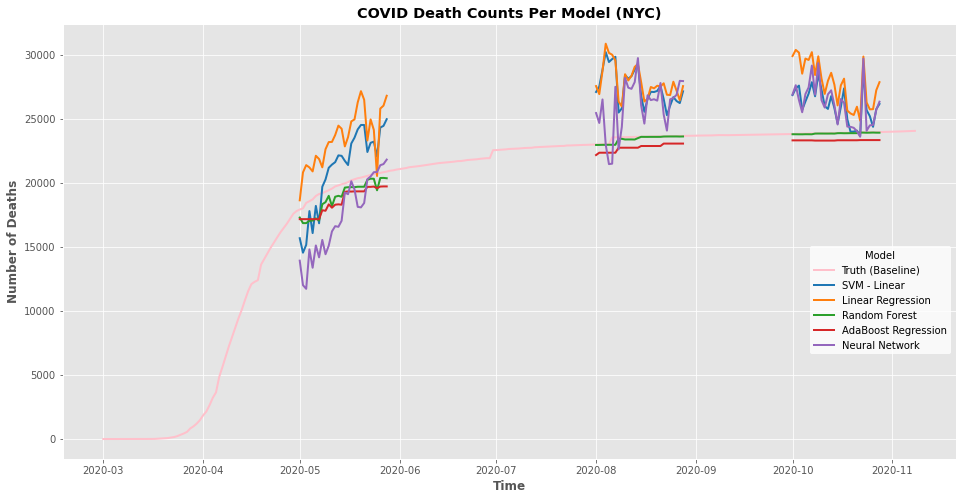

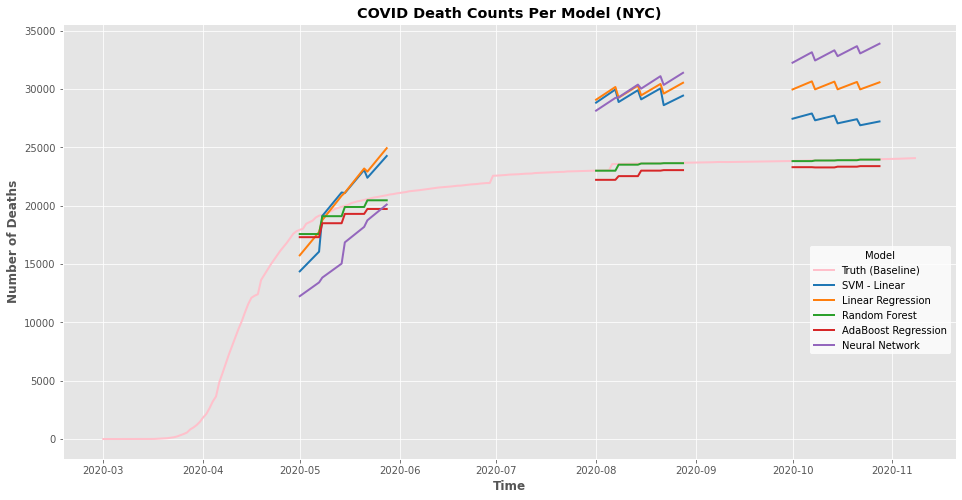

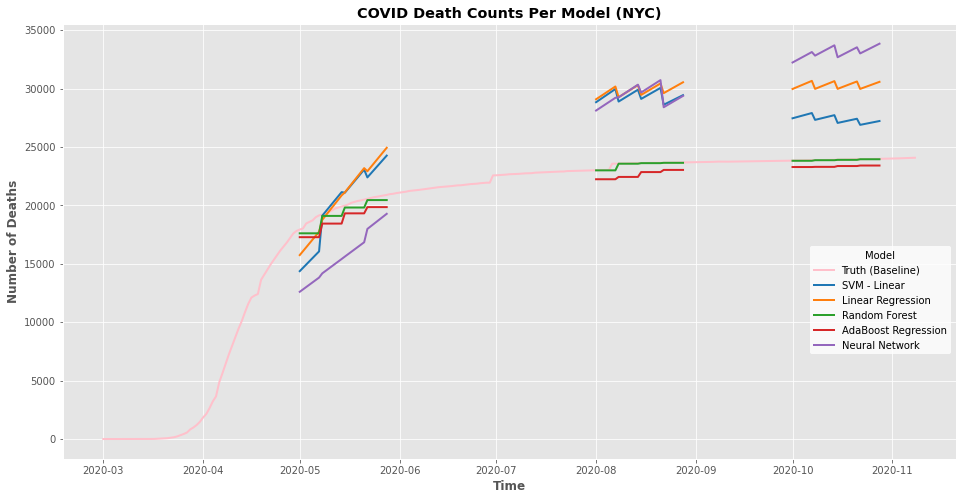

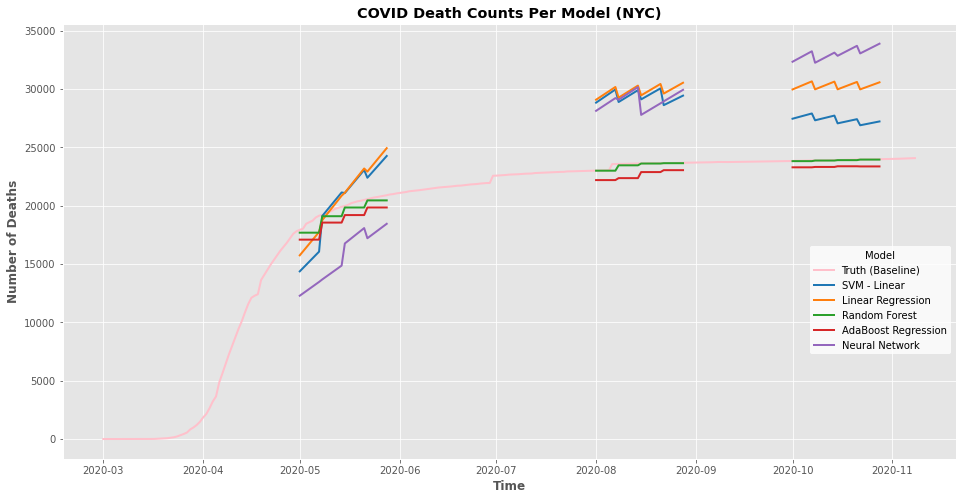

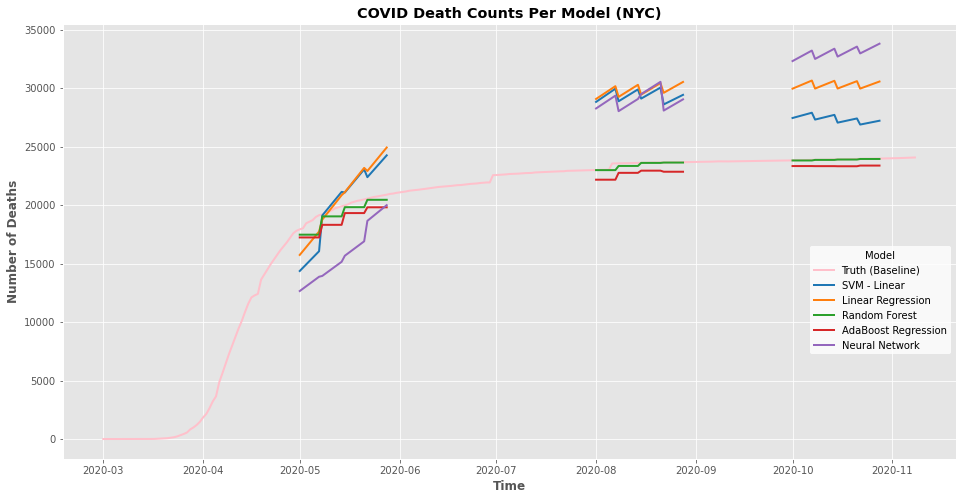

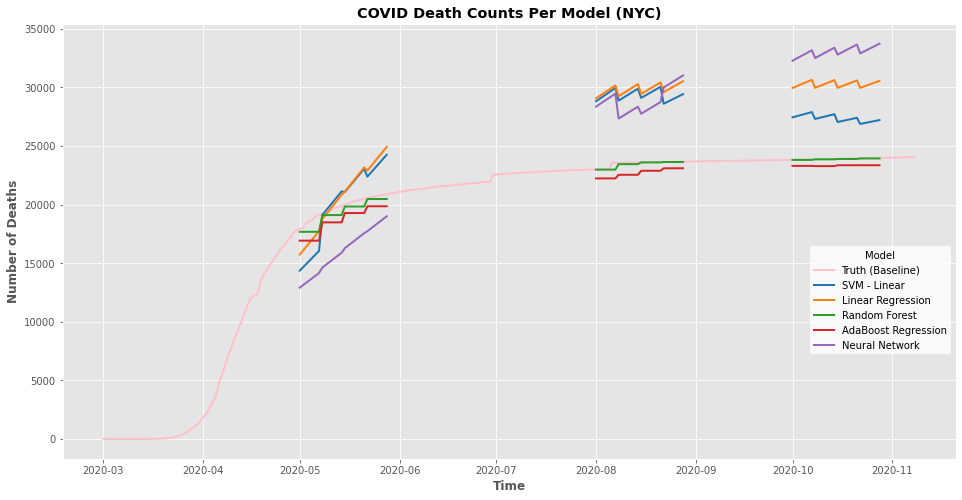

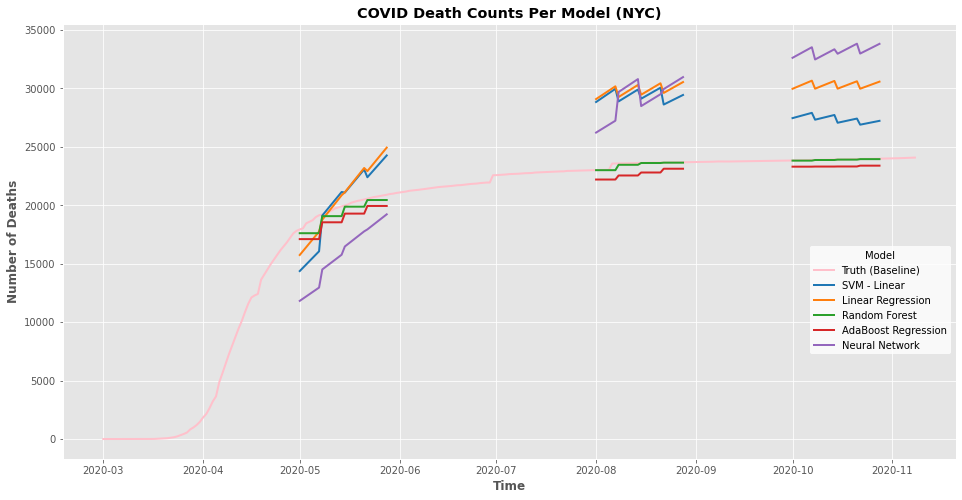

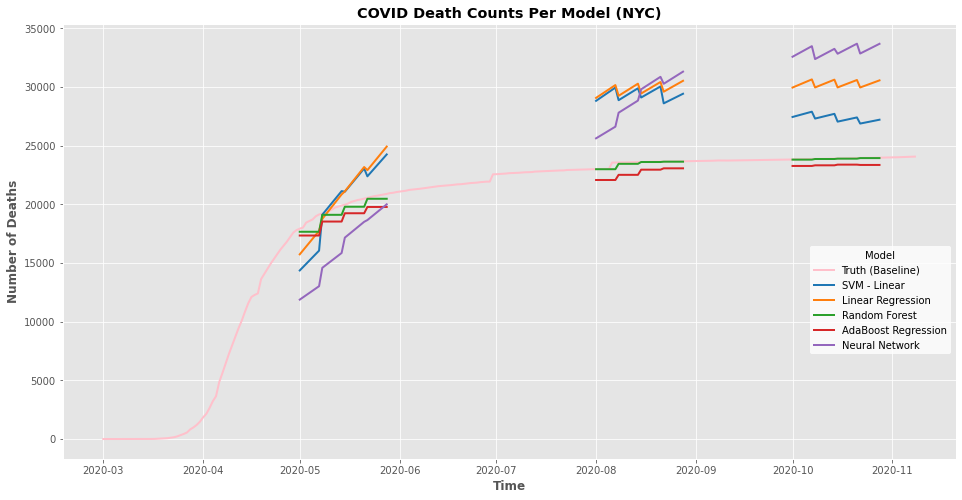

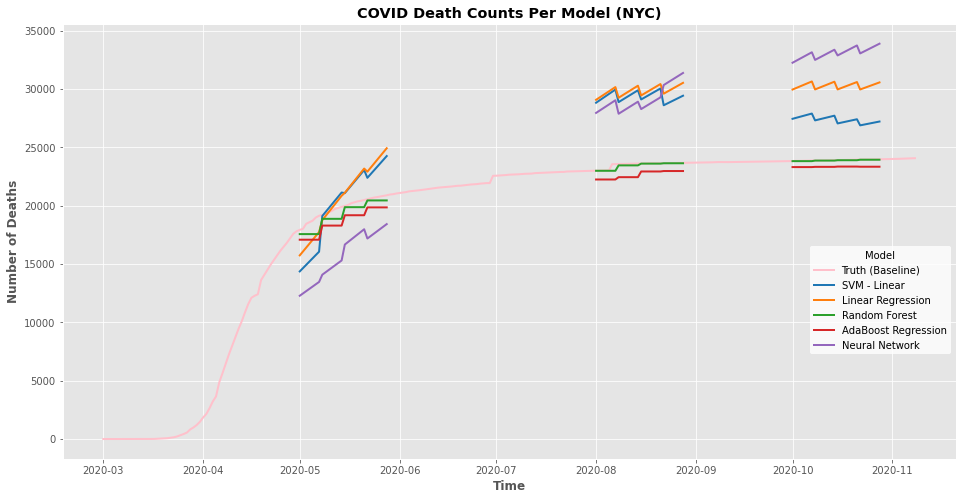

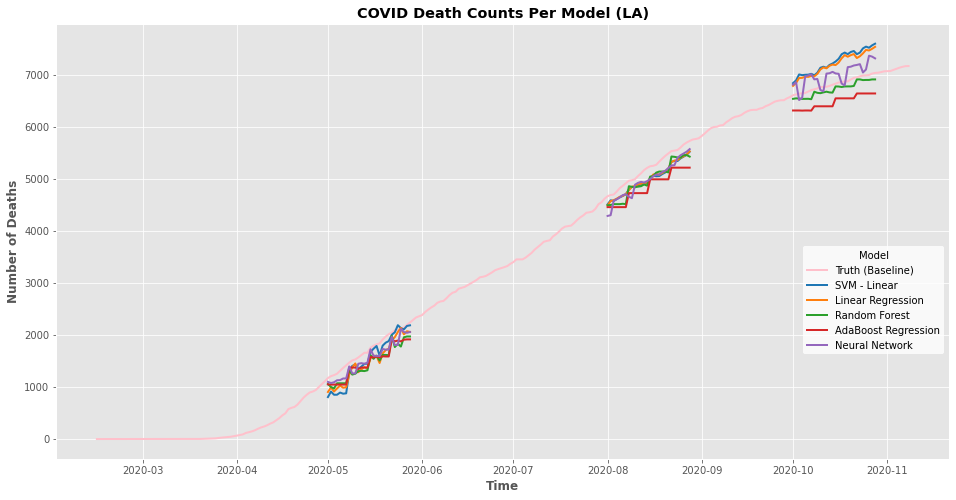

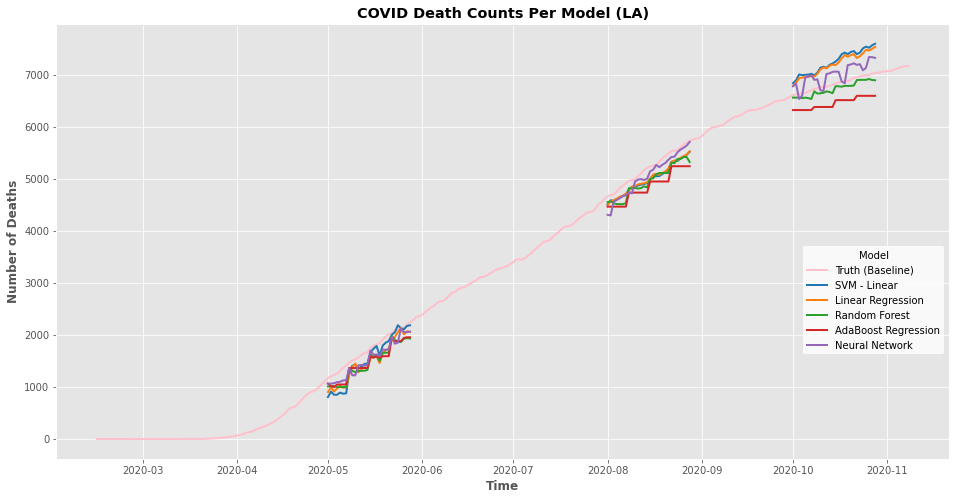

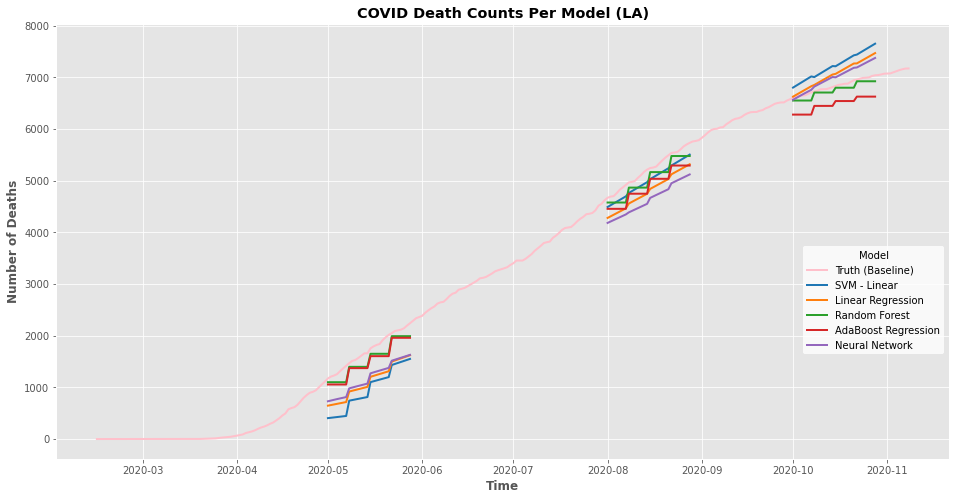

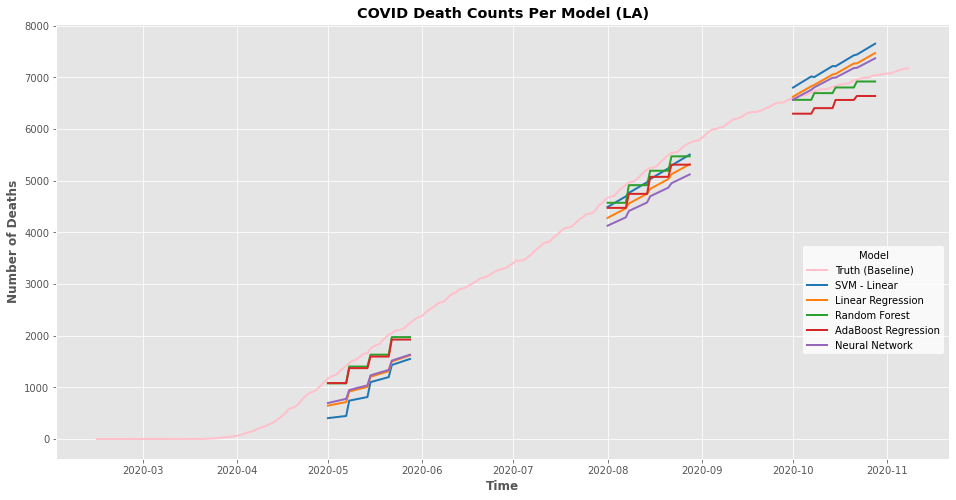

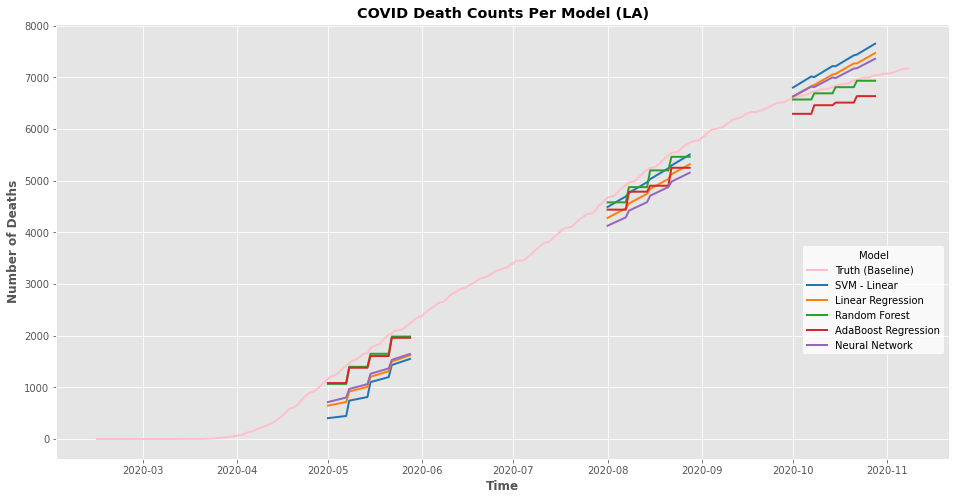

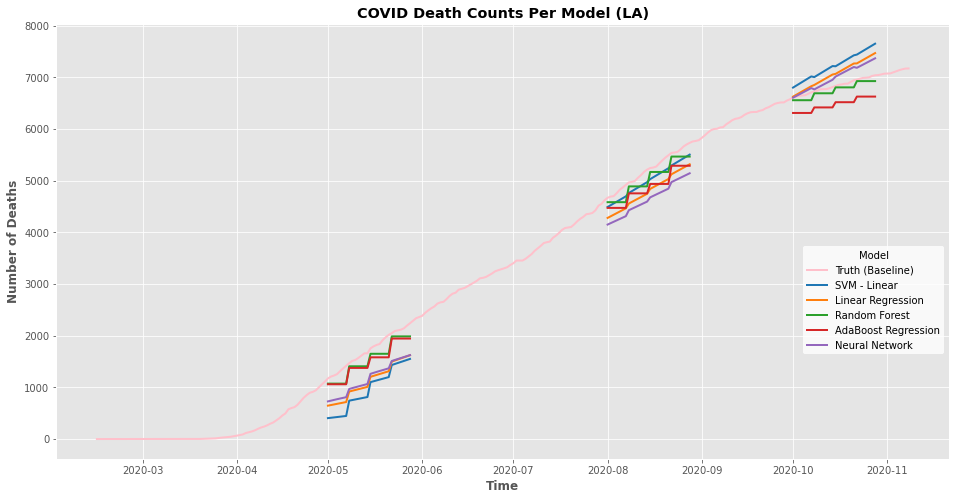

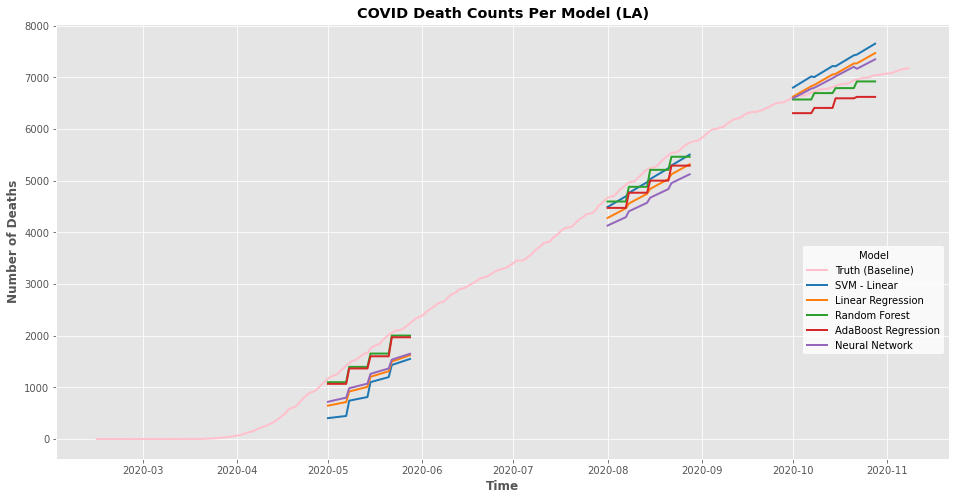

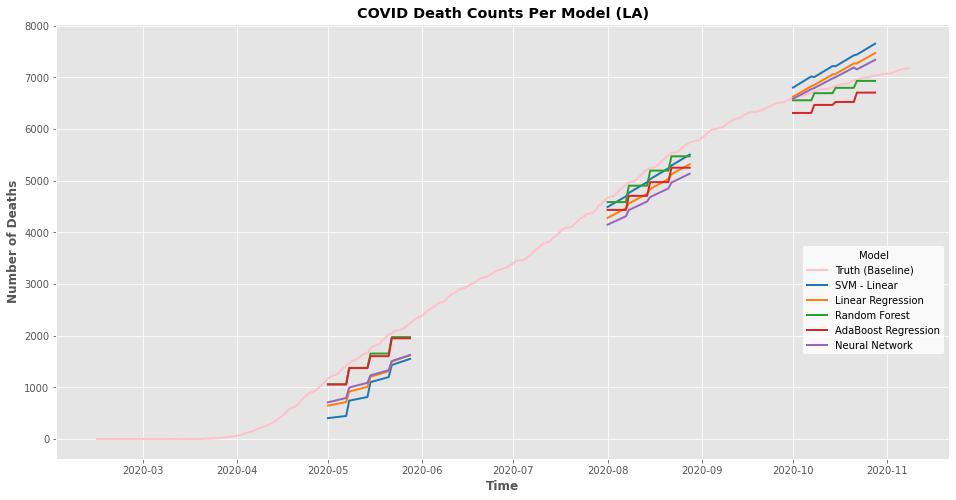

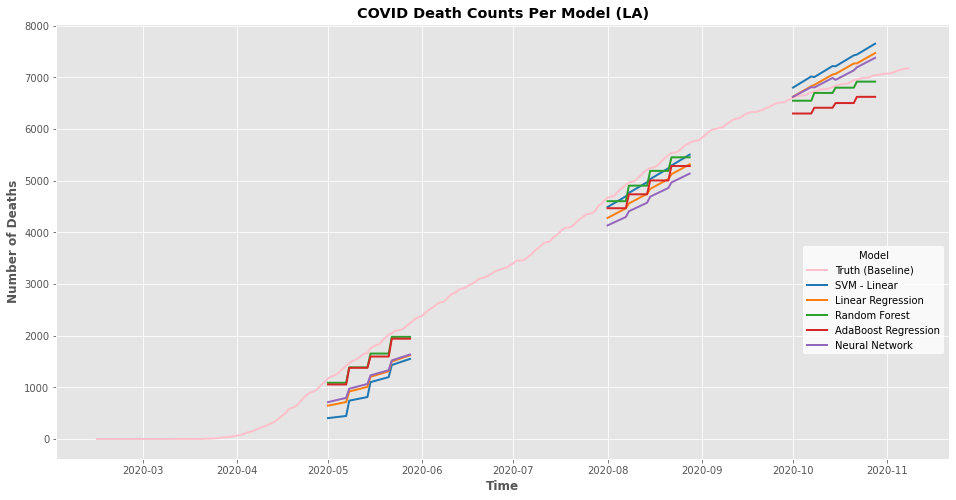

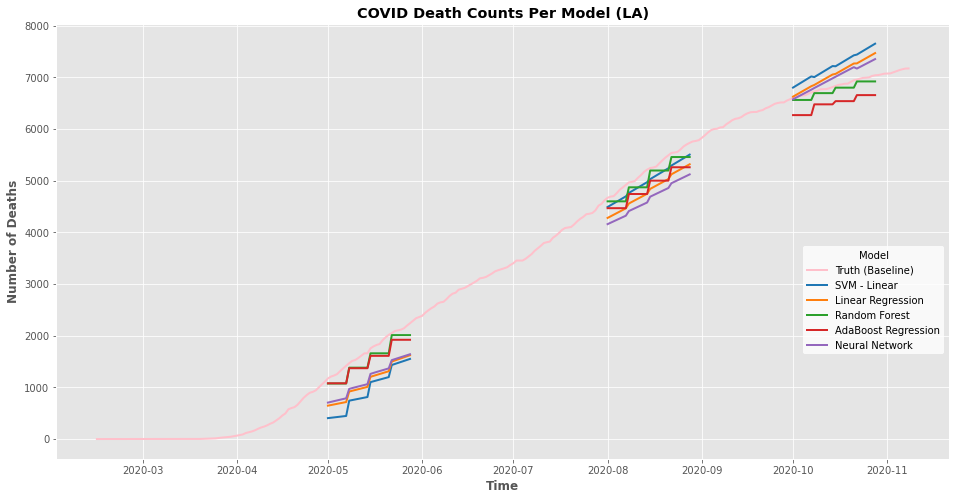

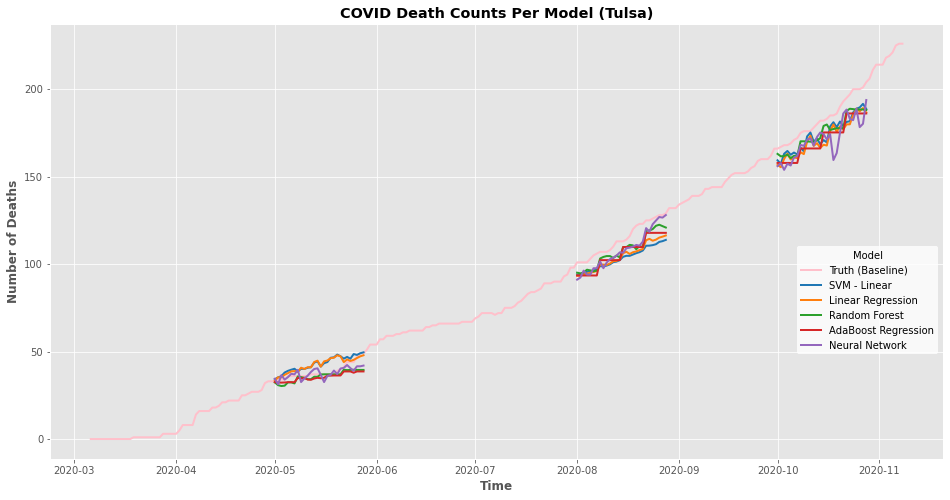

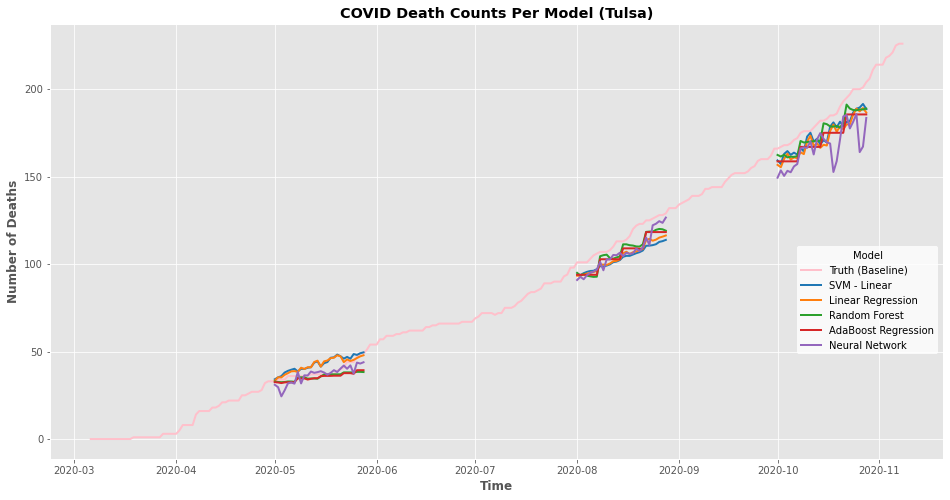

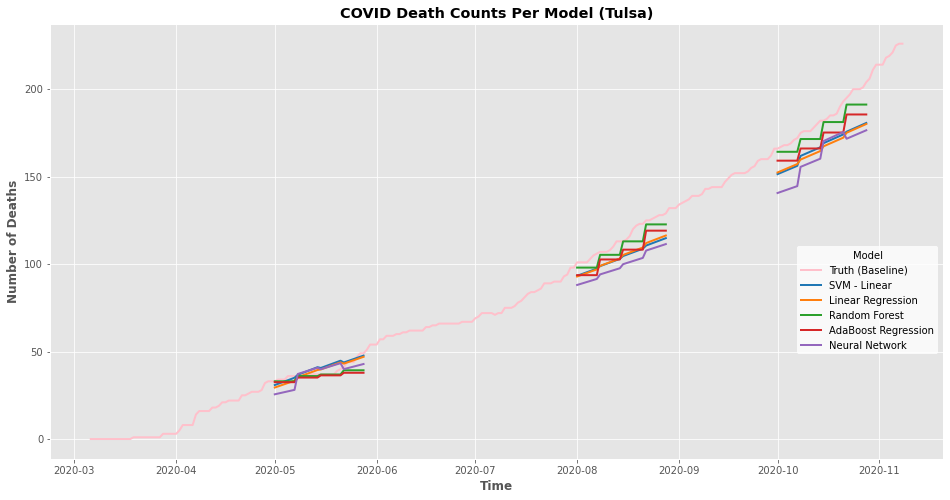

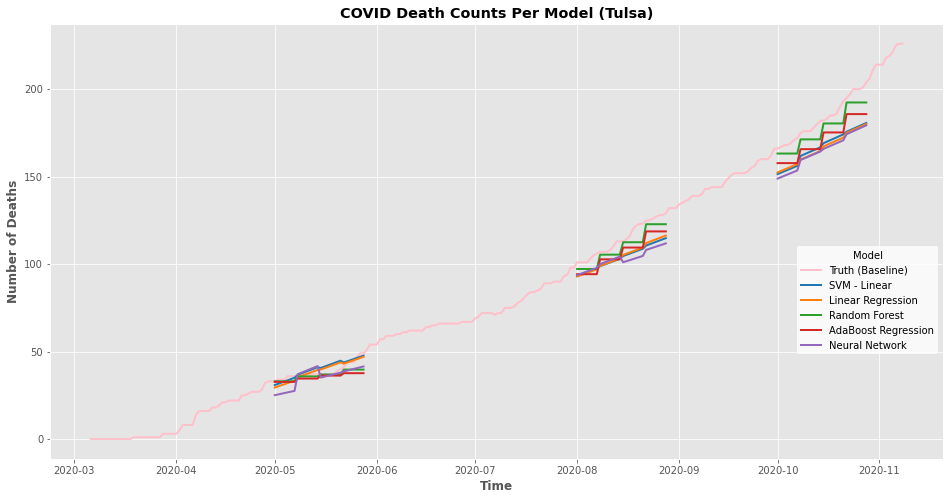

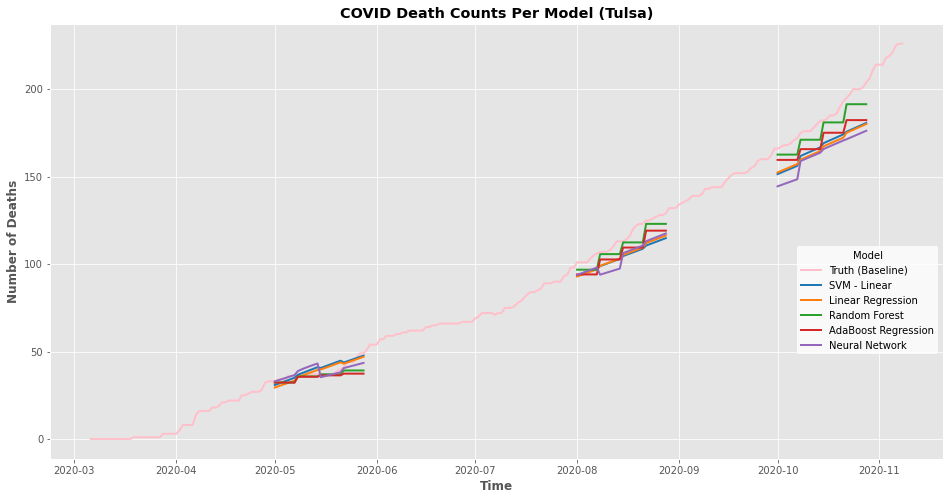

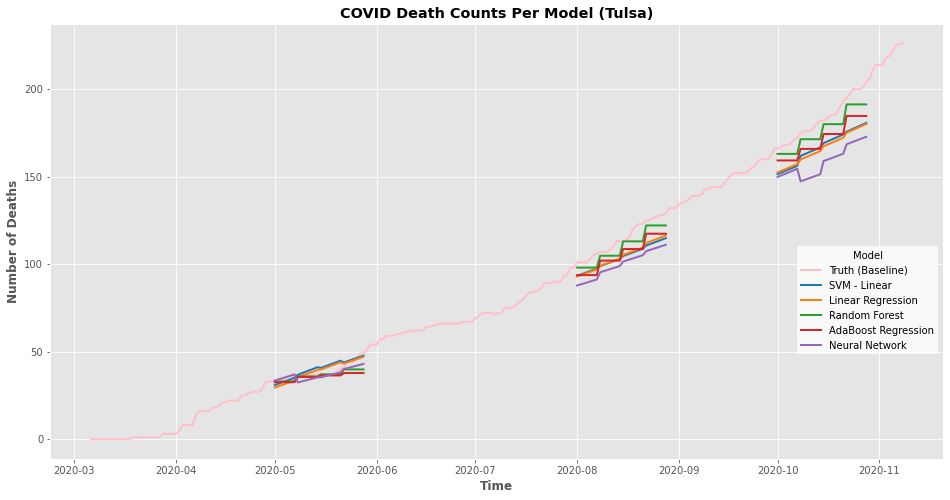

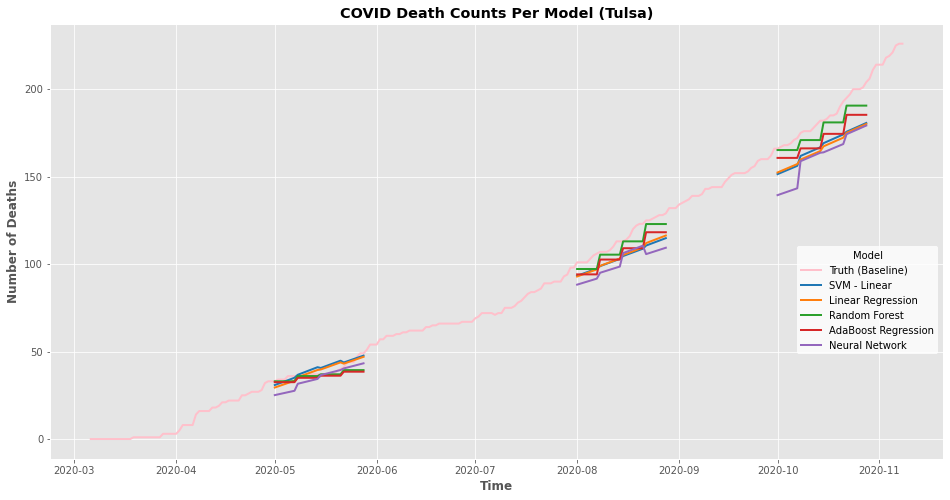

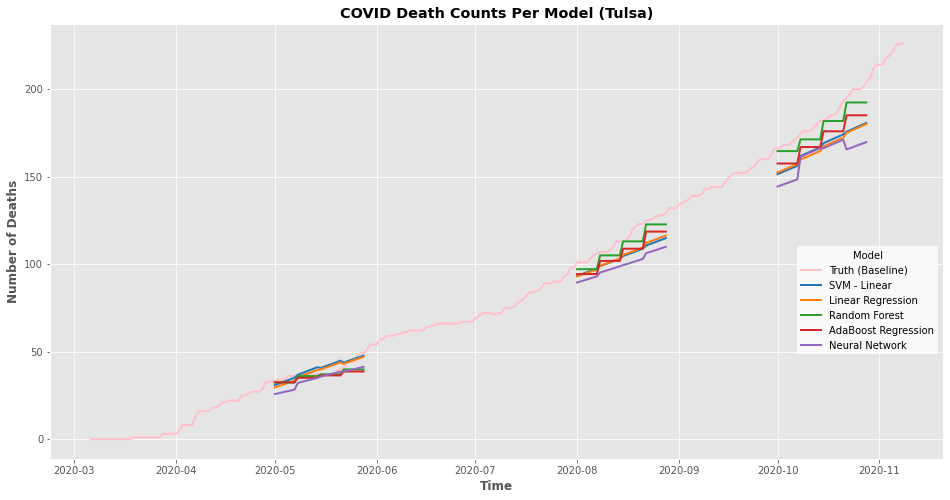

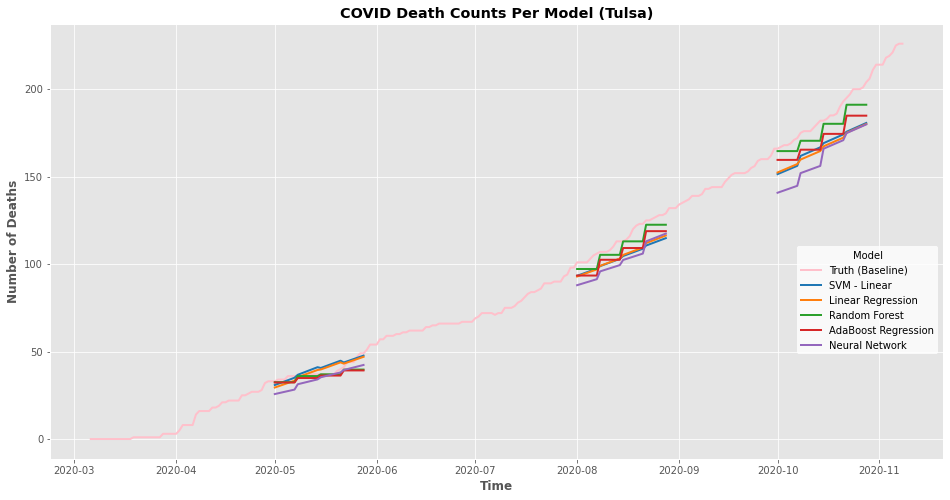

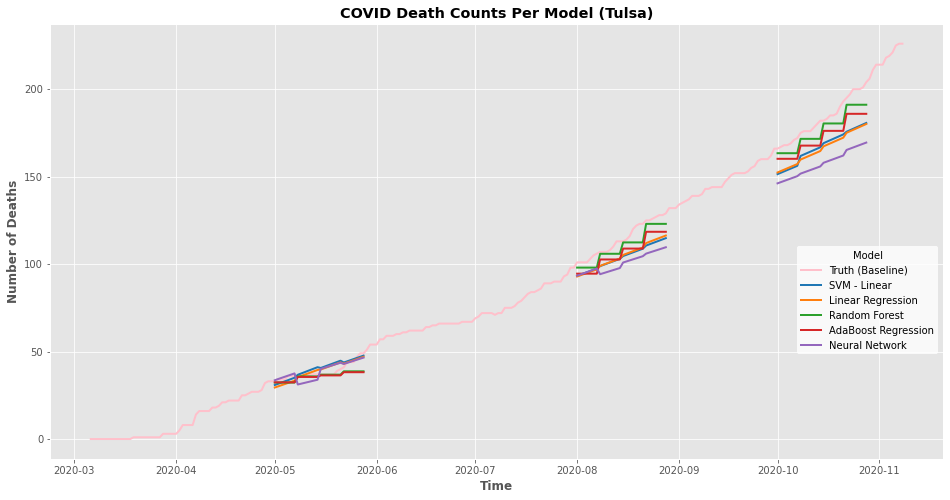

In [16]:
def runs(df, county_name):
    for feature_columns_key in feature_columns_all.keys():
        feature_columns = feature_columns_all[feature_columns_key]
        print("feature_columns: ", feature_columns)
        logging = {}
        logging_features = {}
        logging_rmse = {}
        for date_range in date_ranges:
            print("date_range: ", date_range)
            logging[date_range] = {}
            logging_rmse[date_range] = {}
            logging_features[date_range] = {}
            for modelKey in models.keys():
                print("current model: ", modelKey)
                model = models[modelKey]
                rmse_scores, rmse_percent_scores, predictions = modelIterations(model, df, feature_columns, date_range)
                if modelKey == "Random Forest":
                    logging_features[date_range][modelKey + "_RF_Features"] = {}
                    logging_features[date_range][modelKey + "_RF_Features"]["columns"] = feature_columns
                    logging_features[date_range][modelKey + "_RF_Features"]["feature_importance"] = model.feature_importances_
                if modelKey == "AdaBoost Regression":
                    logging_features[date_range][modelKey + "_ADA_Features"] = {}
                    logging_features[date_range][modelKey + "_ADA_Features"]["columns"] = feature_columns
                    logging_features[date_range][modelKey + "_ADA_Features"]["feature_importance"] = model.feature_importances_

                if modelKey == "Linear Regression":
                    logging_features[date_range][modelKey + "_LR_Features"] = {}
                    logging_features[date_range][modelKey + "_LR_Features"]["columns"] = feature_columns
                    logging_features[date_range][modelKey + "_LR_Features"]["model_coef"] = model.coef_
                    

                print("rmse_scores: ", rmse_scores)
                print("rmse_percent_scores: ", rmse_percent_scores)
                print("predictions: ", predictions)
                logging[date_range][modelKey] = predictions

                logging_rmse[date_range][modelKey] = {}
                logging_rmse[date_range][modelKey]["rmse_scores"] = rmse_scores
                logging_rmse[date_range][modelKey]["rmse_percent_scores"] = rmse_percent_scores
                logging_rmse[date_range][modelKey]["predictions"] = predictions


        # f = open("outputs/output_" + county_name + "_" + str(feature_columns_key) + ".txt", "w")
        # f.write(str(logging))
        # f.close()

        # f = open("outputs/output_features_" + county_name + "_" + str(feature_columns_key) + ".txt", "w")
        # f.write(str(logging_features))
        # f.close()

        pickle.dump(logging, open("outputs/output_" + county_name + "_" + str(feature_columns_key) + ".p", "wb"))
        pickle.dump(logging_rmse, open("outputs/output_rmse_" + county_name + "_" + str(feature_columns_key) + ".p", "wb" ))
        pickle.dump(logging_features, open("outputs/output_features_" + county_name + "_" + str(feature_columns_key) + ".p", "wb" ))

        plot(df, logging, feature_columns, feature_columns_key, county_name)


def plot(df, logging, feature_columns, feature_columns_key, county_name):
    plt.style.use("ggplot")
    plt.figure(figsize=(16,8))

    plt.plot(df["date"].apply(pd.to_datetime), df["deaths"], linewidth=2, label="Truth (Baseline)", color="pink")

    for date_range in logging.keys():

        for modelkey in logging[date_range].keys():
            endTrain, endTest = pd.to_datetime(date_range[0]), pd.to_datetime(date_range[1])
            test_dates = pd.date_range(endTrain, periods=28)
            y_val = [item for sublist in logging[date_range][modelkey] for item in sublist]
            plt.plot(test_dates, y_val, linewidth=2, label=modelkey, color=model_colors[modelkey])

    plt.title("COVID Death Counts Per Model (" + county_name + ")", fontweight="bold")
    plt.xlabel("Time", fontweight="bold")
    plt.ylabel("Number of Deaths", fontweight="bold")
    plt.yscale("linear")


    handles, labels = plt.gca().get_legend_handles_labels()
    newLabels, newHandles = [], []
    for handle, label in zip(handles, labels):
        if label not in newLabels:
            newLabels.append(label)
            newHandles.append(handle)
            
    legend = plt.legend(newHandles, newLabels, title="Model",loc=0, bbox_to_anchor=(1,0.5))
    frame = legend.get_frame()
    frame.set_facecolor("white")
    frame.set_linewidth(0)
    
    filename = "graphs/" + county_name + "/" + str(feature_columns_key) + ".png"
    plt.savefig(filename)


# plot on true deaths vs model predictions for each model for each date range
# logging

# feature_columns = base_columns + mask_breakdown_column + google_maps_columns + apple_maps_columns
# train_x, train_y, test_x, test_y = data_split(nyc_data, feature_columns, date_range_1)
# model = MLPRegressor(random_state=1, max_iter=300).fit(train_x, train_y)
# preds = model.predict(test_x)
# rmse = mean_squared_error(test_y, preds, squared=False)
# print(rmse/ test_y.mean() * 100)

# feature_columns = base_columns + mask_breakdown_column + google_maps_columns + apple_maps_columns
# model = MLPRegressor(random_state=1, max_iter=300)#.fit(train_x, train_y)

# print(modelIterations(model, nyc_data, feature_columns, date_range_1))


runs(nyc_data, "NYC")
runs(la_data, "LA")
runs(tulsa_data, "Tulsa")

# # TODO:
# - test on different feature columns

In [23]:
import os
from os import listdir
from os.path import isfile, join
import ast

my_path = "outputs/"
file_paths = [f for f in listdir(my_path) if isfile(join(my_path, f))]

counties = ["NYC", "LA", "Tulsa"]
column_features_indexes = [x for x in range(1, 11)]

output_files = {}

for path in file_paths:
    for county in counties:
        if county not in output_files:
            output_files[county] = {"output" : [], "output_features" : [], "output_rmse" : []}
        if county in path:date_range_1 = ('2020-05-01', '2020-06-01')
date_range_2 = ('2020-08-01', '2020-09-01')
date_range_3 = ('2020-10-01', '2020-11-01')
date_ranges = [date_range_1, date_range_2, date_range_3]
            if "output_features" in path:
                output_files[county]["output_features"].append(path)
            elif "output_rmse" in path:
                output_files[county]["output_rmse"].append(path)
            elif "output" in path:
                output_files[county]["output"].append(path)

print(output_files)

{'NYC': {'output': ['output_NYC_9.p', 'output_NYC_3.p', 'output_NYC_2.p', 'output_NYC_8.p', 'output_NYC_1.p', 'output_NYC_10.p', 'output_NYC_5.p', 'output_NYC_4.p', 'output_NYC_6.p', 'output_NYC_7.p'], 'output_features': ['output_features_NYC_1.p', 'output_features_NYC_10.p', 'output_features_NYC_2.p', 'output_features_NYC_8.p', 'output_features_NYC_9.p', 'output_features_NYC_3.p', 'output_features_NYC_7.p', 'output_features_NYC_6.p', 'output_features_NYC_4.p', 'output_features_NYC_5.p'], 'output_rmse': ['output_rmse_NYC_9.p', 'output_rmse_NYC_3.p', 'output_rmse_NYC_2.p', 'output_rmse_NYC_8.p', 'output_rmse_NYC_10.p', 'output_rmse_NYC_1.p', 'output_rmse_NYC_5.p', 'output_rmse_NYC_4.p', 'output_rmse_NYC_6.p', 'output_rmse_NYC_7.p']}, 'LA': {'output': ['output_LA_5.p', 'output_LA_4.p', 'output_LA_6.p', 'output_LA_7.p', 'output_LA_9.p', 'output_LA_3.p', 'output_LA_2.p', 'output_LA_8.p', 'output_LA_1.p', 'output_LA_10.p'], 'output_features': ['output_features_LA_7.p', 'output_features_LA_6

outputs/output_rmse_NYC_1.p


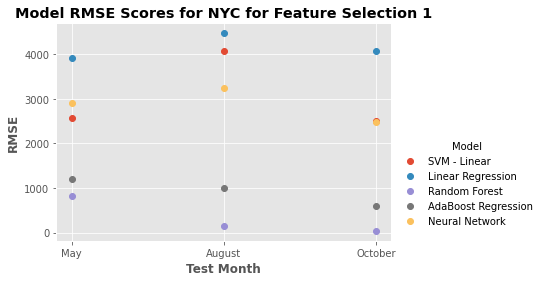

outputs/output_rmse_NYC_10.p


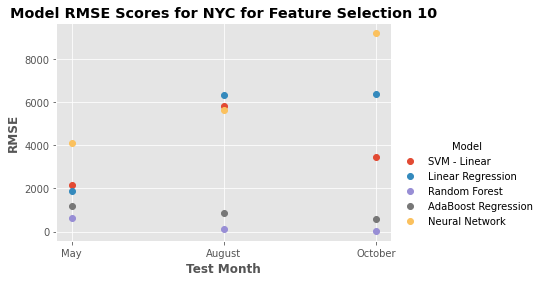

outputs/output_rmse_NYC_2.p


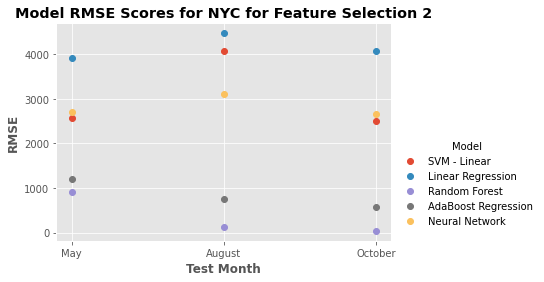

outputs/output_rmse_NYC_3.p


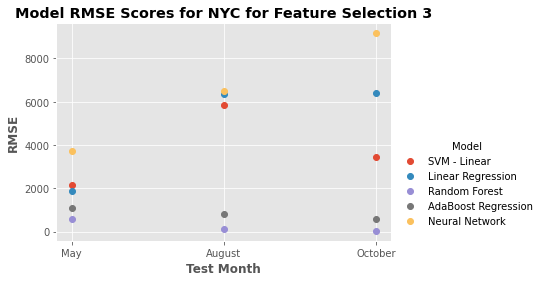

outputs/output_rmse_NYC_4.p


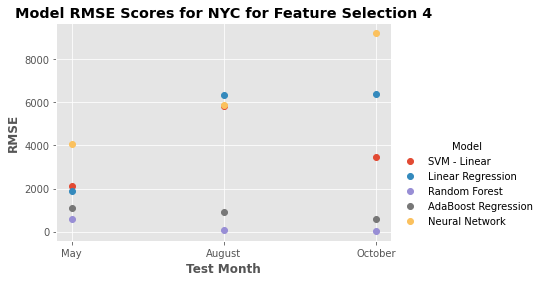

outputs/output_rmse_NYC_5.p


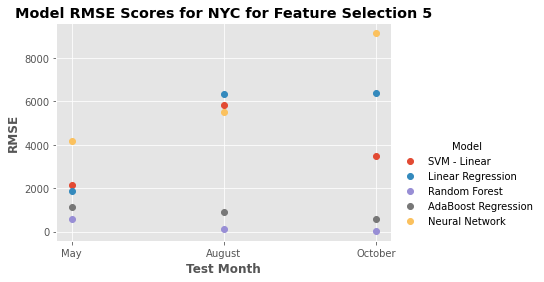

outputs/output_rmse_NYC_6.p


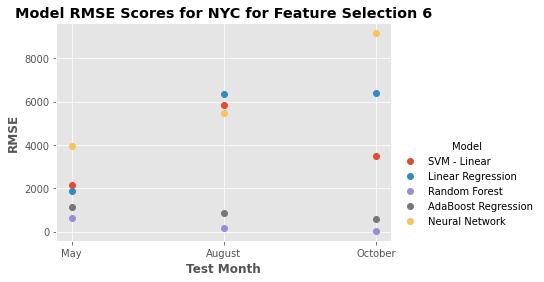

outputs/output_rmse_NYC_7.p


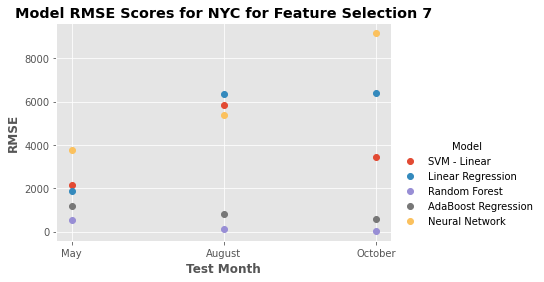

outputs/output_rmse_NYC_8.p


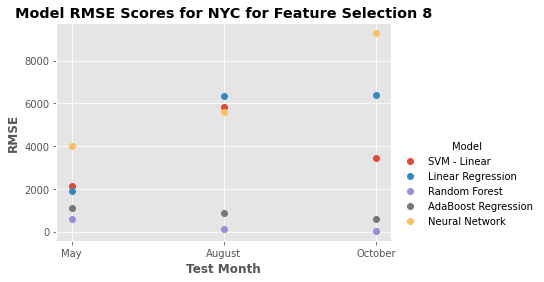

outputs/output_rmse_NYC_9.p


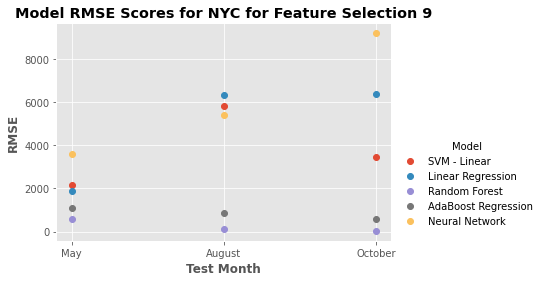

outputs/output_rmse_LA_1.p


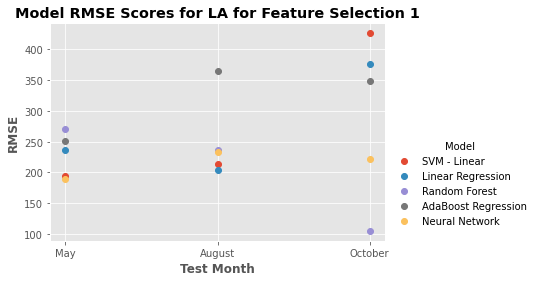

outputs/output_rmse_LA_10.p


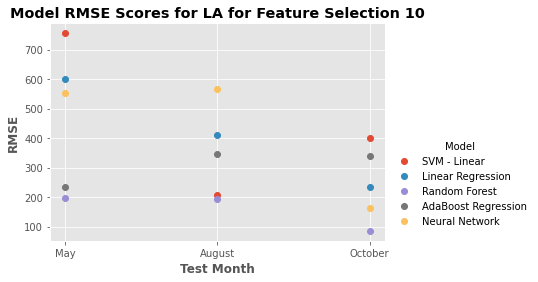

outputs/output_rmse_LA_2.p


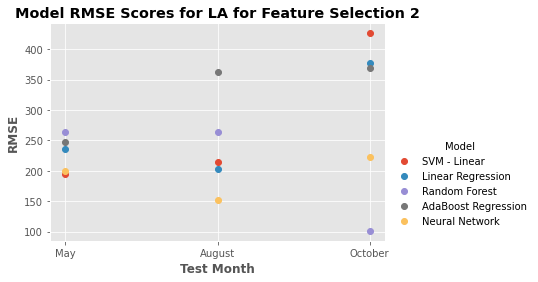

outputs/output_rmse_LA_3.p


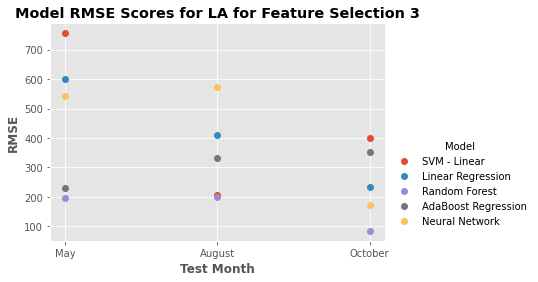

outputs/output_rmse_LA_4.p


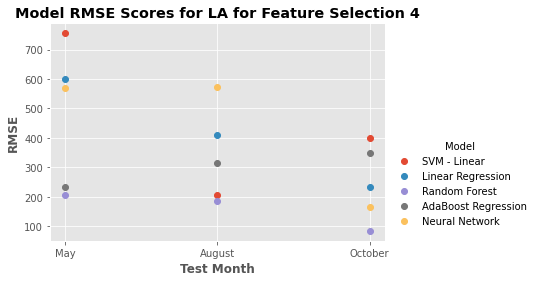

outputs/output_rmse_LA_5.p


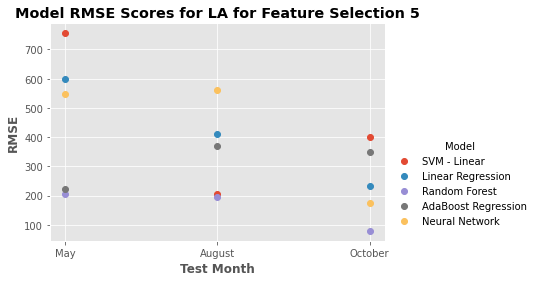

outputs/output_rmse_LA_6.p


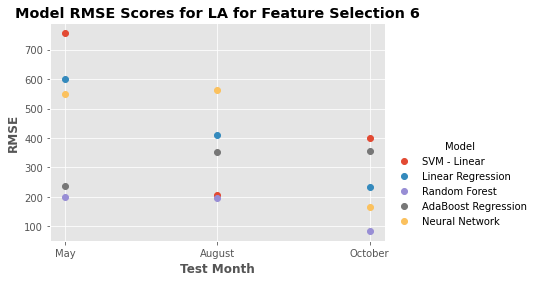

outputs/output_rmse_LA_7.p


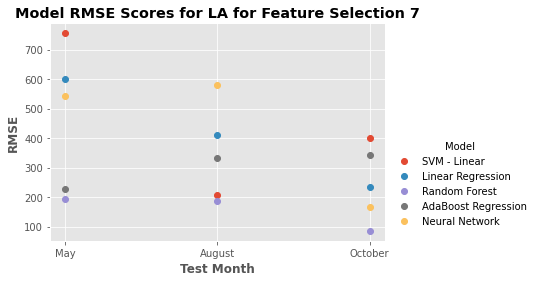

outputs/output_rmse_LA_8.p


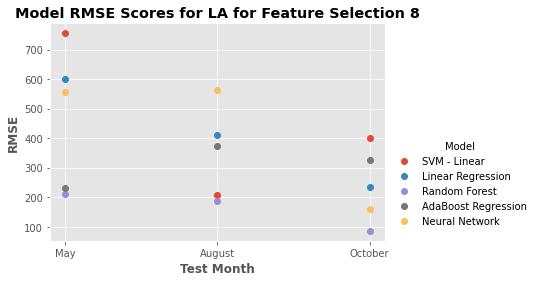

outputs/output_rmse_LA_9.p


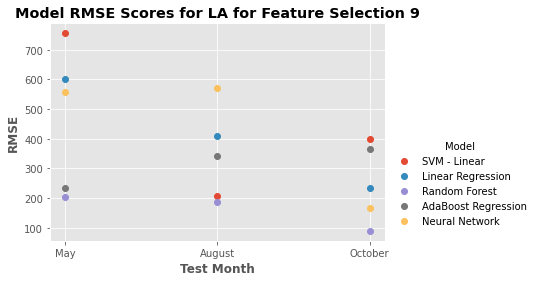

outputs/output_rmse_Tulsa_1.p


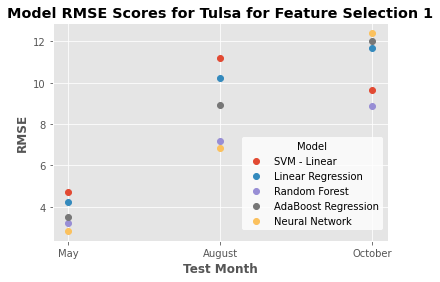

outputs/output_rmse_Tulsa_10.p


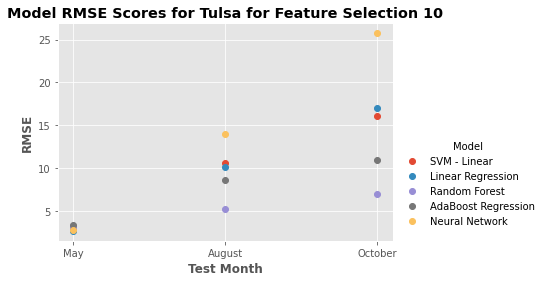

outputs/output_rmse_Tulsa_2.p


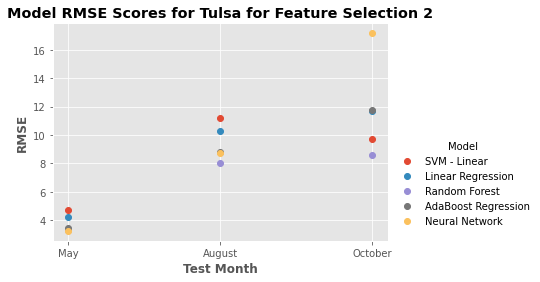

outputs/output_rmse_Tulsa_3.p


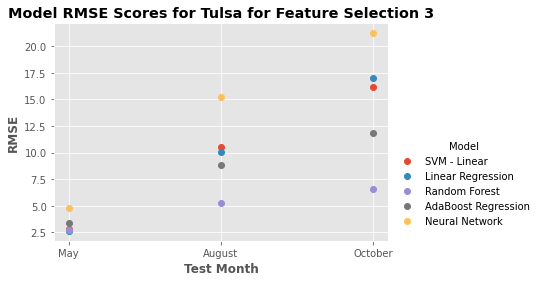

outputs/output_rmse_Tulsa_4.p


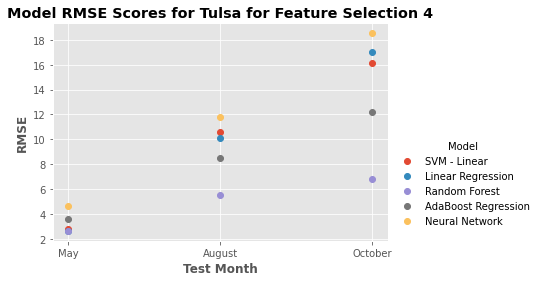

outputs/output_rmse_Tulsa_5.p


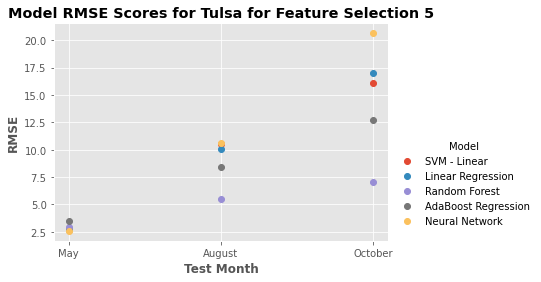

outputs/output_rmse_Tulsa_6.p


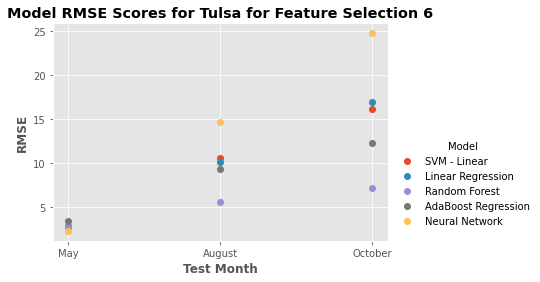

outputs/output_rmse_Tulsa_7.p


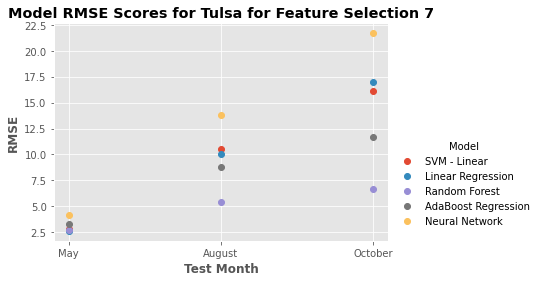

outputs/output_rmse_Tulsa_8.p


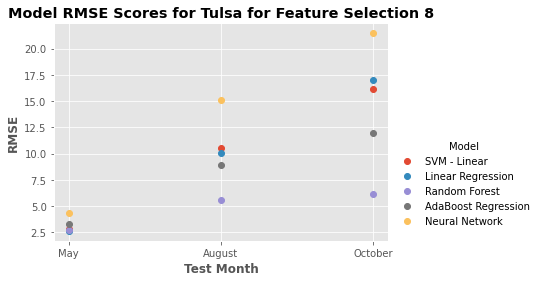

outputs/output_rmse_Tulsa_9.p


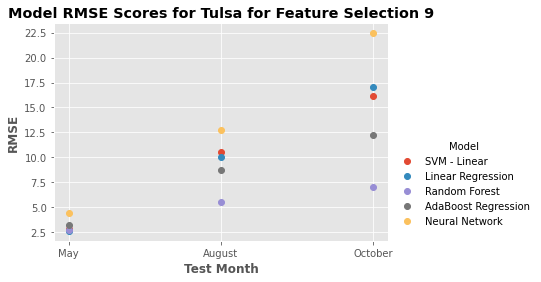

In [55]:
date_range_1 = ('2020-05-01', '2020-06-01')
date_range_2 = ('2020-08-01', '2020-09-01')
date_range_3 = ('2020-10-01', '2020-11-01')
date_ranges_labels = {date_range_1: "May", date_range_2: "August", date_range_3: "October"}
months = ["May", "August", "October"]

errors = {}

# feature selection
#     date_ranges
#         model 
#             average all three counties rmse

for county in counties:
    outputs = sorted(output_files[county]['output_rmse'])
    for output in outputs:
        path = "outputs/" + output
        print(path)
        output_dict = pickle.load(open(path, "rb" ) )
        
        model_to_date = {}
        model_avg_all_dates = {}
        feature_selection_index = int(''.join(i for i in path if i.isdigit()))

        if feature_selection_index not in errors:
            errors[feature_selection_index] = {}

        for date_range in output_dict.keys():
            for modelKey in output_dict[date_range].keys():
                # print(output_dict[date_range][modelKey]['rmse_scores'])
                # print(date_range, modelKey, np.mean(output_dict[date_range][modelKey]['rmse_scores']))
                if modelKey not in model_to_date:
                    model_to_date[modelKey] = []
                model_to_date[modelKey].append(np.mean(output_dict[date_range][modelKey]['rmse_scores']))

                if modelKey not in errors[feature_selection_index]:
                    errors[feature_selection_index][modelKey] = {}
                if date_range not in errors[feature_selection_index][modelKey]:
                    errors[feature_selection_index][modelKey][date_range] = []
                errors[feature_selection_index][modelKey][date_range].append(np.mean(output_dict[date_range][modelKey]['rmse_scores']))

        plt.style.use("ggplot")
        
        for model in model_to_date:
            plt.plot(months,  model_to_date[model], 'o', linewidth=1, label=model)

        plt.title("Model RMSE Scores for " + county + " for Feature Selection " +  str(feature_selection_index), fontweight="bold")
        plt.xlabel("Test Month", fontweight="bold")
        plt.ylabel("RMSE", fontweight="bold")
        plt.yscale("linear")

        legend = plt.legend(title="Model",loc=0, bbox_to_anchor=(1,0.5))
        frame = legend.get_frame()
        frame.set_facecolor("white")
        frame.set_linewidth(0)

        plt.show()


In [41]:
errors

{1: {'SVM - Linear': {('2020-05-01', '2020-06-01'): [2580.0989525413534,
    194.6040459375339,
    4.703271202692475],
   ('2020-08-01', '2020-09-01'): [4067.3822973260294,
    213.91445987780014,
    11.213738079557777],
   ('2020-10-01', '2020-11-01'): [2510.84332895224,
    426.25838453562693,
    9.650405121634625]},
  'Linear Regression': {('2020-05-01', '2020-06-01'): [3913.4801359308676,
    236.26363484537669,
    4.216896791184217],
   ('2020-08-01', '2020-09-01'): [4470.794895168999,
    203.58505074109337,
    10.253482138332934],
   ('2020-10-01', '2020-11-01'): [4066.4215442586674,
    377.0281823371788,
    11.660149895395097]},
  'Random Forest': {('2020-05-01', '2020-06-01'): [816.9390842471141,
    270.1834701449782,
    3.2043809027095556],
   ('2020-08-01', '2020-09-01'): [155.42807176398654,
    235.7565969097672,
    7.165958623297186],
   ('2020-10-01', '2020-11-01'): [38.44849673765307,
    104.91197321721654,
    8.857681978765832]},
  'AdaBoost Regression': {(

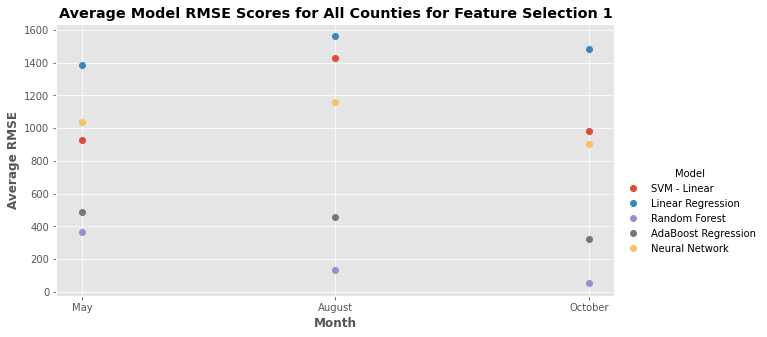

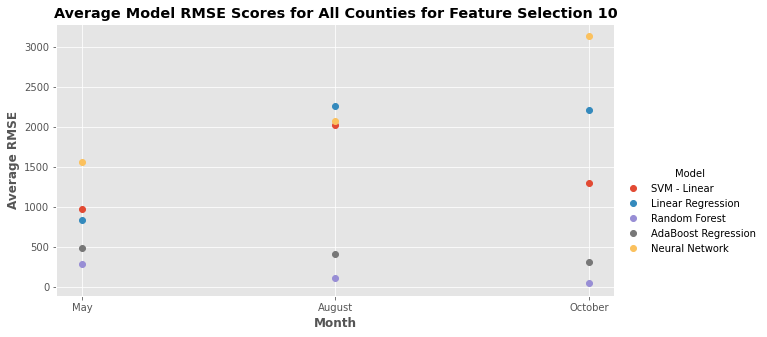

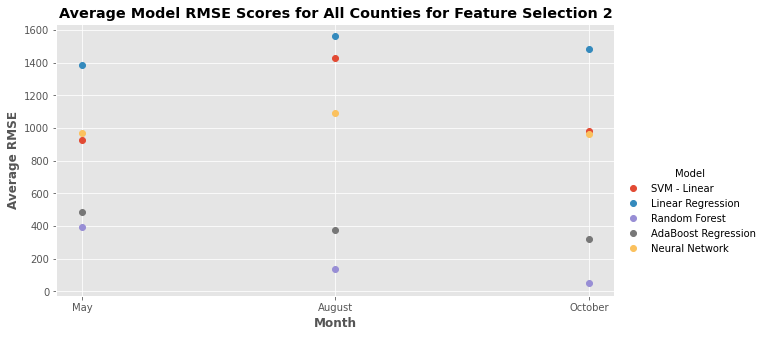

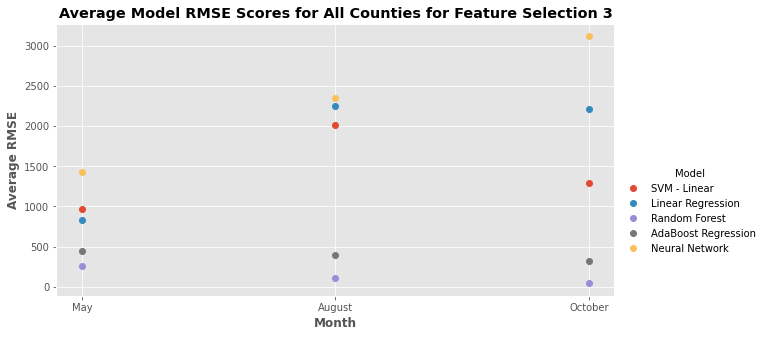

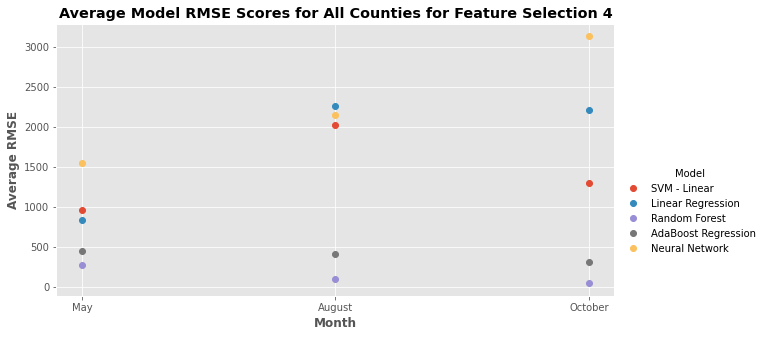

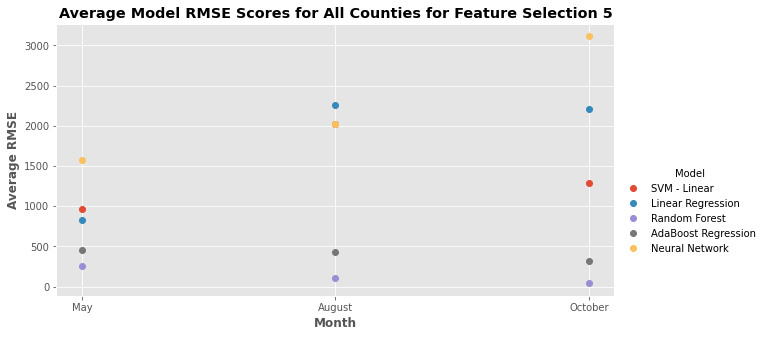

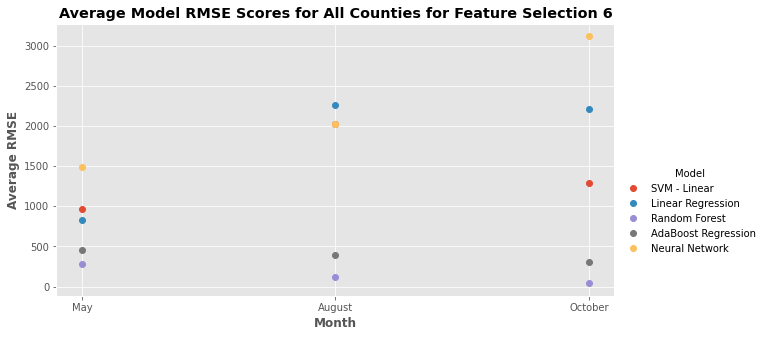

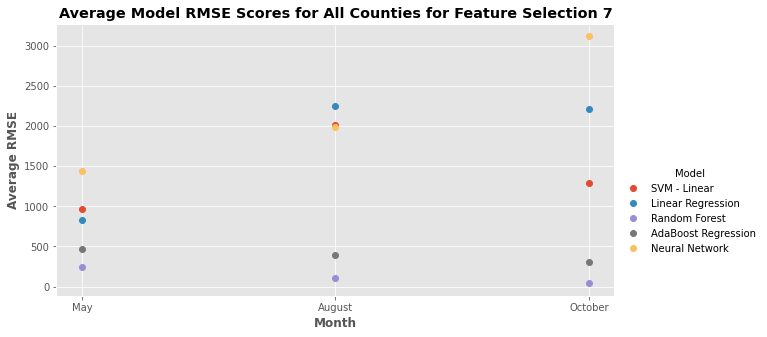

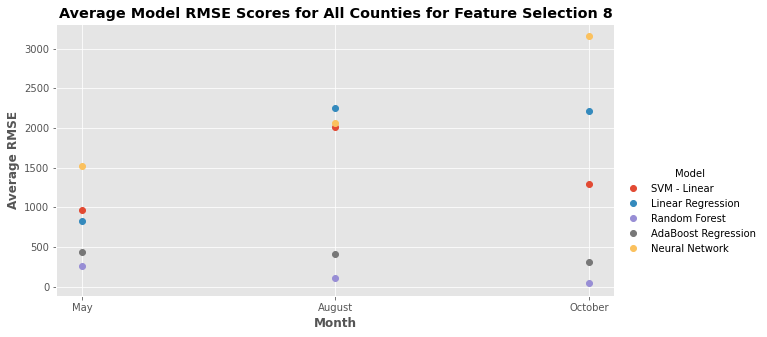

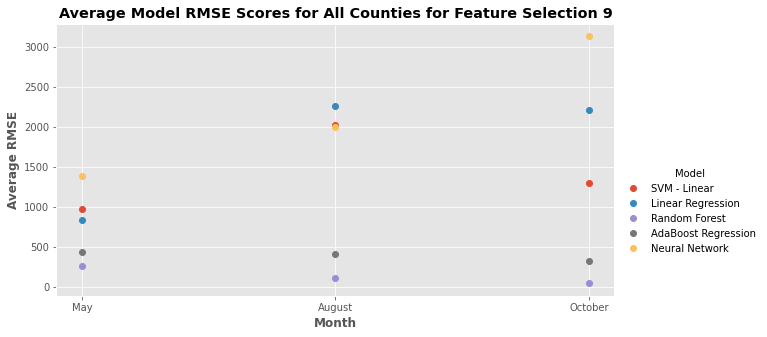

In [60]:
for error_feature_selection_index in errors:
    plt.style.use("ggplot")
    plt.figure(figsize=(10,5))
    models_error = errors[error_feature_selection_index]
    months = ["May", "August", "October"]
    date_ranges_labels = {date_range_1: "May", date_range_2: "August", date_range_3: "October"}

    for model in models_error:
        temp = {}
        for date_range in models_error[model]:
            temp[date_ranges_labels[date_range]] = np.mean(models_error[model][date_range])
        # print(str(error_feature_selection_index), str(model), np.mean(list(temp.values())))
        plt.plot(temp.keys(),  temp.values(), 'o', linewidth=1, label=model)

    plt.title("Average Model RMSE Scores for All Counties for Feature Selection " +  str(error_feature_selection_index), fontweight="bold")
    plt.xlabel("Month", fontweight="bold")
    plt.ylabel("Average RMSE", fontweight="bold")
    plt.yscale("linear")

    legend = plt.legend(title="Model",loc=0, bbox_to_anchor=(1,0.5))
    frame = legend.get_frame()
    frame.set_facecolor("white")
    frame.set_linewidth(0)

    filename = "graphs/feature_selection/rmse_" + str(error_feature_selection_index) + ".png"
    plt.savefig(filename)

    # plt.show()


- data processing
- difficulty joining data because of how many datasets we had
- graph colors were ugly
- we wwere trying to be very intential with our data and didnt want to skew it/ we tried to keep it normalized
- mask score and political score, we had to be careful how we constructed them
- couldnt pass in dates so we passed in days til start
- add correlations between mobility and mask usage
- run model combining all 3 cities and see if politics/mask usage is weighted heavily as an input